In [25]:
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
#lololololol
#-----------------Mätning1------------------------------------
Spänning1_1_file = r'./Mätningar/Ångström_1/Spänning1.csv'
Spänning1_2_file = r'./Mätningar/Ångström_1/Spänning2.csv'
Temperatur1_1_file = r'./Mätningar/Ångström_1/Temperatur1.csv'
Temperatur1_2_file = r'./Mätningar/Ångström_1/Temperatur2.csv'
#-----------------Mätning2------------------------------------
Spänning2_1_file = r'./Mätningar/Ångström_2/Spänning1.csv'
Spänning2_2_file = r'./Mätningar/Ångström_2/Spänning2.csv'
Temperatur2_1_file = r'./Mätningar/Ångström_2/Temperatur1.csv'
Temperatur2_2_file = r'./Mätningar/Ångström_2/Temperatur2.csv'
#-----------------Mätning2------------------------------------
Spänning3_1_file = r'./Mätningar/Ångström_3/Spänning1.csv'
Spänning3_2_file = r'./Mätningar/Ångström_3/Spänning2.csv'
Temperatur3_1_file = r'./Mätningar/Ångström_3/Temperatur1.csv'
Temperatur3_2_file = r'./Mätningar/Ångström_3/Temperatur2.csv'

In [32]:
class Data:

    def __init__(self, data, Mätintervall):
        self.datadict = {}
        self.datadict['Time'] = []
        self.datadict['Amplitude'] = []
        with open(data, 'r', encoding='utf-8') as file:
            for row in file:
                if row[0].isnumeric():
                    r = row.split(';')
                    self.datadict['Time'].append(r[0]*Mätintervall)
                    self.datadict['Amplitude'].append(float('.'.join(r[1][:-1].split(','))))
        return

In [33]:
Temperatur1_1 = Data(Temperatur1_1_file, 5)
Temperatur1_2 = Data(Temperatur1_2_file, 5)
Temperatur2_1 = Data(Temperatur2_1_file, 2)
Temperatur2_2 = Data(Temperatur2_2_file, 2)
Temperatur3_1 = Data(Temperatur2_1_file, 2)
Temperatur3_2 = Data(Temperatur2_2_file, 2)

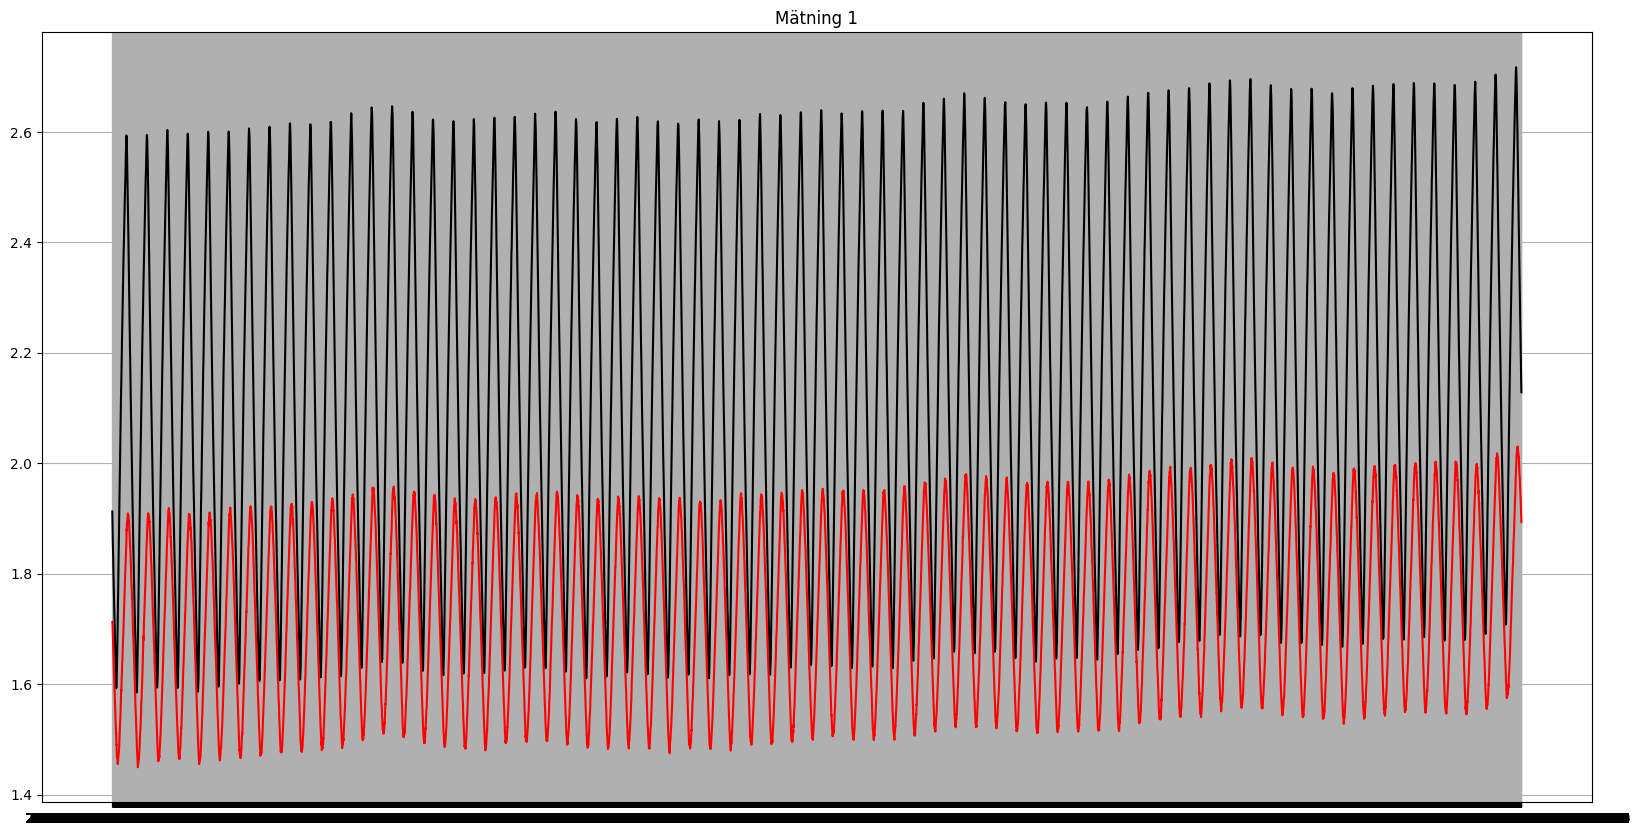

In [31]:
plt.figure(figsize = (20,10))
plt.title('Mätning 1')
plt.plot(Temperatur1_1.datadict['Time'][2500:], Temperatur1_1.datadict['Amplitude'][2500:], 'k-')
plt.plot(Temperatur1_2.datadict['Time'][2500:], Temperatur1_2.datadict['Amplitude'][2500:], 'r-')
plt.grid()
plt.show()
plt.figure(figsize = (20,10))
plt.title('Mätning 2')
plt.plot(Temperatur2_1.datadict['Time'][3000:], Temperatur2_1.datadict['Amplitude'][3000:], 'k--')
plt.plot(Temperatur2_2.datadict['Time'][3000:], Temperatur2_2.datadict['Amplitude'][3000:], 'r--')
plt.grid()
plt.show()
plt.figure(figsize = (20,10))
plt.title('Mätning 3')
plt.plot(Temperatur3_1.datadict['Time'][3000:], Temperatur3_1.datadict['Amplitude'][3000:], 'k--')
plt.plot(Temperatur3_2.datadict['Time'][3000:], Temperatur3_2.datadict['Amplitude'][3000:], 'r--')
plt.grid()
plt.show()

0.0016674722087965201


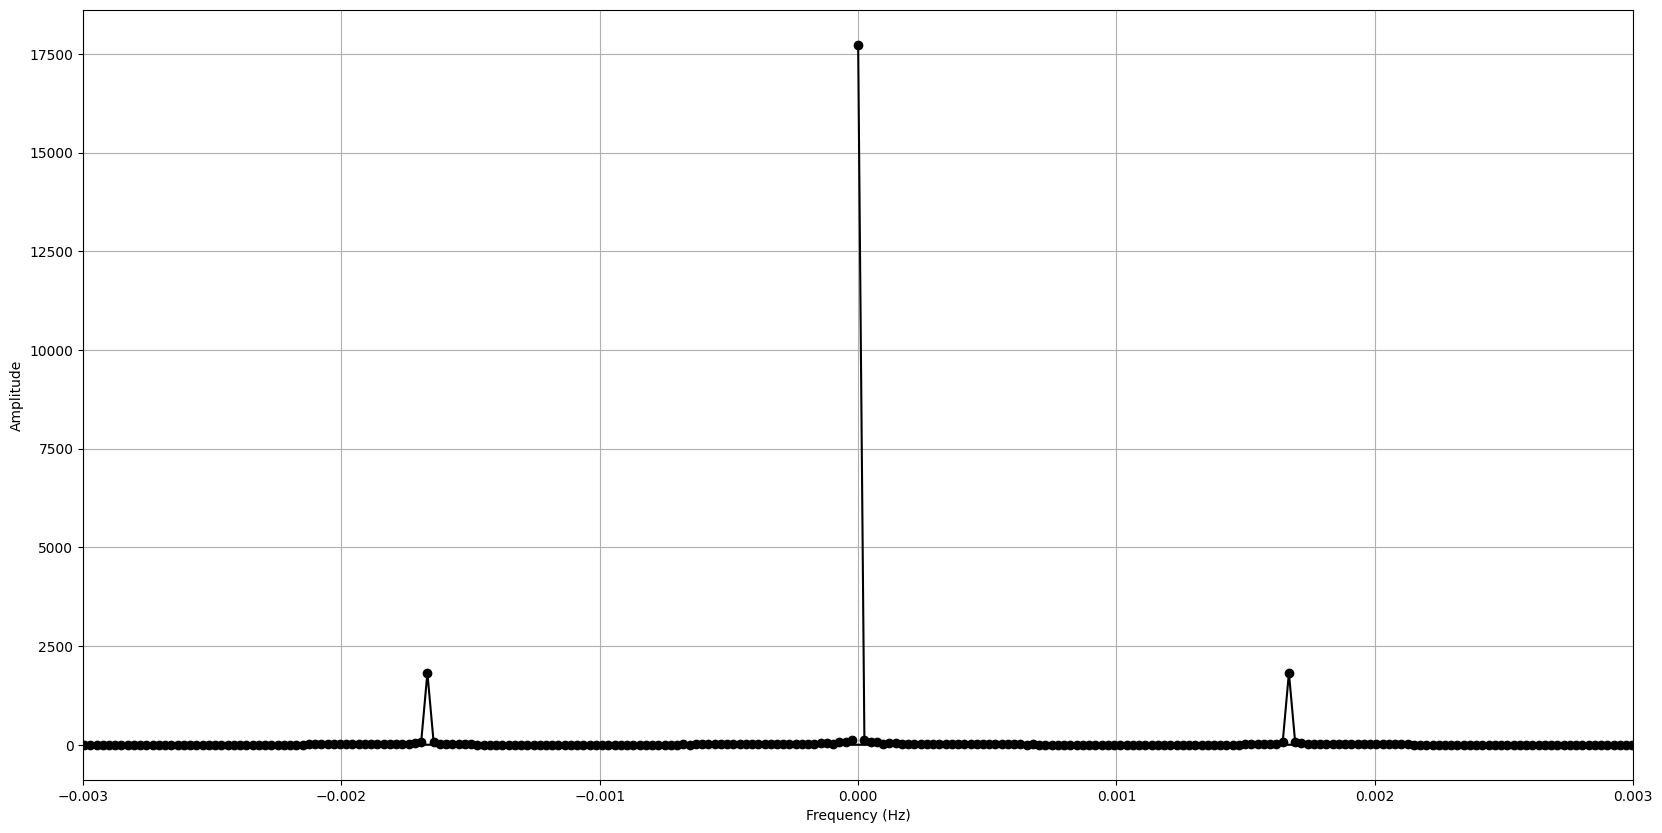

In [50]:
def Oscillation_Frequency(x, y):
    x, y = np.array(x), np.array(y)
    Freq_Amplitudes = np.abs(np.fft.fft(y))
    Freq = np.fft.fftfreq(len(x), x[1]-x[0])
    FFT = {}
    for i in range(len(Freq)):
        FFT[np.abs(Freq_Amplitudes[i])] = Freq[i]
    sorted_list = sorted(FFT.items(), key = lambda x:x[0])
    return Freq, Freq_Amplitudes, FFT[sorted_list[-2][0]]

Freq, Freq_Amplitudes, Frequency = Oscillation_Frequency(Temperatur1_1.df['Time'][2500:], Temperatur1_1.df['Y'][2500:])
print(Frequency)
plt.figure(figsize=(20, 10))
plt.plot(Freq, Freq_Amplitudes, 'ko-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim([-0.003, 0.003])
plt.show()